In [1]:
import pandas as pd

In [120]:
data = pd.read_csv("datasets_554905_1035602_houses_to_rent_v2.csv")


In [121]:
data.head()
data.rename(columns = {"hoa (R$)":"condominio", "rent amount (R$)":"aluguel","property tax (R$)":"iptu","fire insurance (R$)":"seguro_incendio","total (R$)":"total"}, inplace = True)

- valor medio por cidade
- numero banheiro casas acima da media
- correlacoes
- data vis (heat map, histograma, facetgrid)

In [122]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,condominio,aluguel,iptu,seguro_incendio,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


### Valor medio por cidade

In [35]:
data.groupby("city")["aluguel"].mean()

city
Belo Horizonte    3664.127981
Campinas          2364.290739
Porto Alegre      2337.699916
Rio de Janeiro    3232.904064
São Paulo         4652.793783
Name: aluguel, dtype: float64

### N medio banheiro imoveis com aluguel alto

Quarto quartil pra cada uma das cidades (>75%)

In [50]:
cidades = set(data.city)
valores_altos = []
for cidade in cidades:
    desc = data["aluguel"].loc[data.city == cidade].describe()
    media_banheiros = data.bathroom.loc[(data.aluguel > desc['75%']) & (data.city == cidade)].mean()
    print("A media de banheiros em imoveis caros em ", cidade, "é igual a ", media_banheiros)

A media de banheiros em imoveis caros em  Belo Horizonte é igual a  4.061290322580645
A media de banheiros em imoveis caros em  Porto Alegre é igual a  2.8817567567567566
A media de banheiros em imoveis caros em  Campinas é igual a  3.638095238095238
A media de banheiros em imoveis caros em  São Paulo é igual a  3.893296853625171
A media de banheiros em imoveis caros em  Rio de Janeiro é igual a  2.6549865229110514


### Relacao entre mobilia e valor

In [123]:
from sklearn.preprocessing import LabelEncoder
tipos = data.dtypes
encoders = {}

for coluna,tipo in tipos.items():
    le = LabelEncoder()
    if tipo == 'object':
        print(coluna, tipo)
        data[coluna] = le.fit_transform(data[coluna])
        encoders[coluna] = le

city object
floor object
animal object
furniture object


In [119]:
data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,condominio,aluguel,iptu,seguro_incendio,total
0,4,70,2,1,1,32,0,0,2065,3300,211,42,5618
1,4,320,4,4,0,13,0,1,1200,4960,1750,63,7973
2,2,80,1,1,1,31,0,1,1000,2800,0,41,3841
3,2,51,2,1,0,12,0,1,270,1112,22,17,1421
4,4,25,1,1,0,1,1,1,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,2,63,2,1,1,29,1,0,402,1478,24,22,1926
10688,4,285,4,4,4,9,0,1,3100,15000,973,191,19260
10689,3,70,3,3,0,33,1,0,980,6000,332,78,7390
10690,3,120,2,2,2,33,0,0,1585,12000,279,155,14020


In [99]:
data[["aluguel","furniture"]].corr()

,aluguel,furniture
aluguel,1.000000,-0.164235
furniture,-0.164235,1.000000


### DataVis

In [64]:
import seaborn as sns

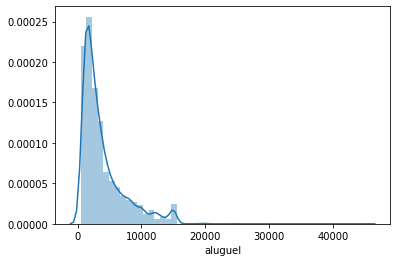

In [66]:
sns.distplot(data.aluguel)

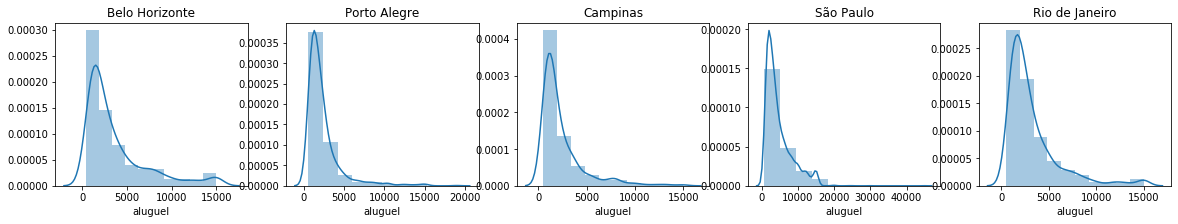

In [128]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,5, figsize = (20,3))
data.city = encoders["city"].inverse_transform(data["city"])
cidades = list(set(data.city))
for cidade in cidades:
    indice = cidades.index(cidade)
    sns.distplot(data.aluguel.loc[data.city == cidade], bins=10, ax=axes[indice])
    axes[indice].set_title(cidade)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

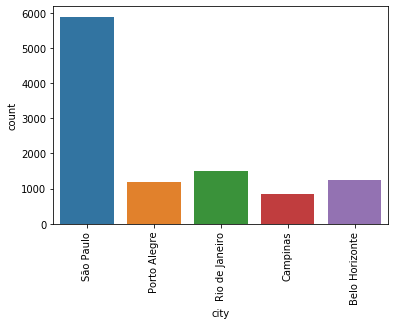

In [130]:
sns.countplot(x=data.city, data = data)
plt.xticks(rotation = "vertical")

In [118]:
encoders.keys()

dict_keys(['floor', 'animal', 'furniture'])

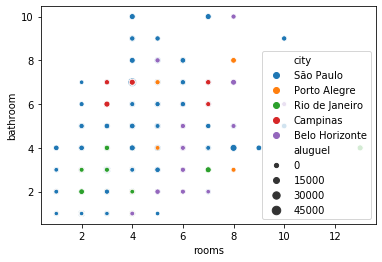

In [134]:
sns.scatterplot(x=data.rooms, y = data.bathroom, hue = data.city, size = data.aluguel)

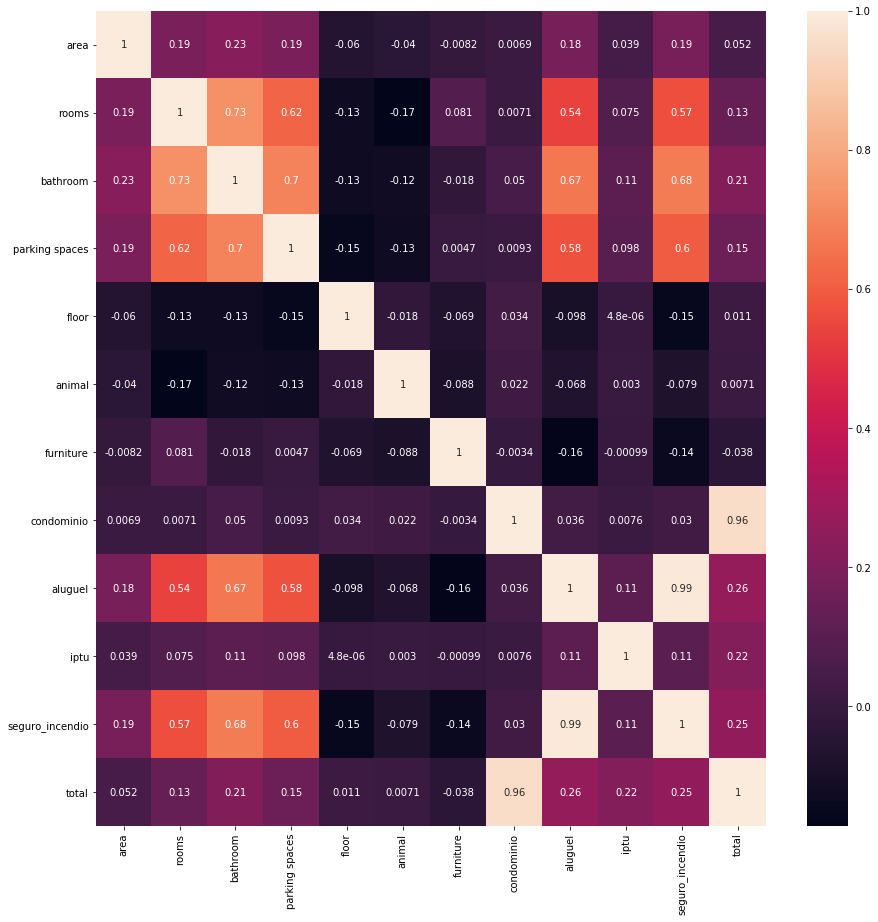

In [137]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)